<a href="https://colab.research.google.com/github/jieshi1010/gemini-on-vertex/blob/main/PT_PayGo_%2B_gemini_2_5_flash_image_preview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install the Vertex AI SDK: Open a terminal window and enter the command below. You can also [install it in a virtualenv](https://googleapis.dev/python/aiplatform/latest/index.html)

In [ ]:
!pip install --upgrade google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.1/244.1 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: google-genai
    Found existing installation: google-genai 1.33.0
    Uninstalling google-genai-1.33.0:
      Successfully uninstalled google-genai-1.33.0


## 认证

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

## 生图

Okay, here is a random image for you! 


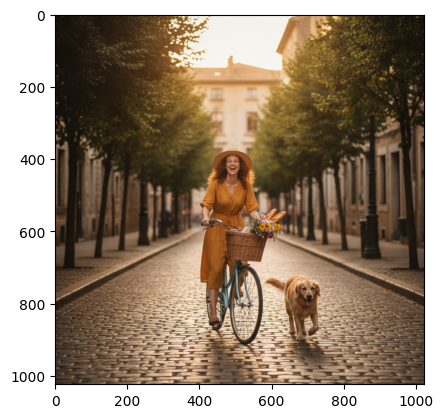

In [ ]:
from google import genai
from google.genai import types
import base64
from google.genai.types import GenerateContentConfig, Modality
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

def generate():

  client = genai.Client(
      vertexai=True,
      project="cloud-llm-preview1", # replace this with your project
      location="global",
      http_options=HttpOptions(
        api_version="v1",
        headers={
            # Options: 设置成dedicated就是必须走PT的意思
            # - "dedicated": Use Provisioned Throughput
            # - "shared": Use pay-as-you-go
            # https://cloud.google.com/vertex-ai/generative-ai/docs/use-provisioned-throughput
            "X-Vertex-AI-LLM-Request-Type": "shared"
        },
    )
  )


  model = "gemini-2.5-flash-image-preview"
  contents = [
    types.Content(
      role="user",
      parts=[
        types.Part.from_text(text="""test generating a random image""")
      ]
    )
  ]

  generate_content_config = types.GenerateContentConfig(
    temperature = 1,
    top_p = 0.95,
    max_output_tokens = 32768,
    response_modalities = ["TEXT", "IMAGE"],
    safety_settings = [types.SafetySetting(
      category="HARM_CATEGORY_HATE_SPEECH",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_DANGEROUS_CONTENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_HARASSMENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_IMAGE_HATE",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_IMAGE_DANGEROUS_CONTENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_IMAGE_HARASSMENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_IMAGE_SEXUALLY_EXPLICIT",
      threshold="OFF"
    )],
  )

  response = client.models.generate_content(
    model = model,
    contents = contents,
    config = generate_content_config,
    )

  for part in response.candidates[0].content.parts:
    if part.text:
        print(part.text)
    elif part.inline_data:
        image = Image.open(BytesIO((part.inline_data.data)))

        image.save("example-image.png")

        #image.show()
        imgplot = plt.imshow(image)

generate()

## 编辑图

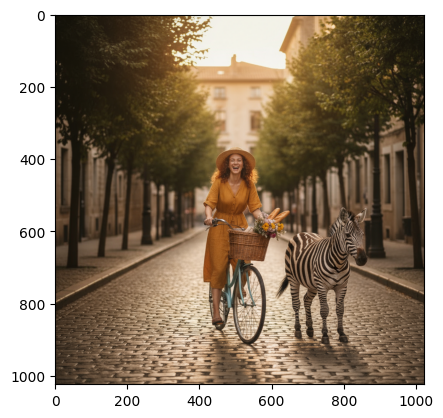

In [ ]:
from google import genai
from google.genai import types
import base64
from google.genai.types import GenerateContentConfig, Modality, HttpOptions
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

def generate():
  client = genai.Client(
      vertexai=True,
      project="veo-testing",
      location="global",
      http_options=HttpOptions(
        api_version="v1",
        headers={
            # Options:
            # - "dedicated": Use Provisioned Throughput
            # - "shared": Use pay-as-you-go
            # https://cloud.google.com/vertex-ai/generative-ai/docs/use-provisioned-throughput
            "X-Vertex-AI-LLM-Request-Type": "shared"
        },
    )
  )


  model = "gemini-2.5-flash-image-preview"
  with open('example-image.png', 'rb') as f:
      image_bytes = f.read()
  contents = [
    types.Content(
      role="user",
      parts=[types.Part.from_bytes(data=image_bytes,mime_type='image/jpeg'),
             types.Part.from_text(text="""add a zebra into this image.""")
      ]
    )
  ]

  generate_content_config = types.GenerateContentConfig(
    temperature = 1,
    top_p = 0.95,
    max_output_tokens = 32768,
    response_modalities = ["TEXT", "IMAGE"],
    safety_settings = [types.SafetySetting(
      category="HARM_CATEGORY_HATE_SPEECH",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_DANGEROUS_CONTENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_HARASSMENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_IMAGE_HATE",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_IMAGE_DANGEROUS_CONTENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_IMAGE_HARASSMENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_IMAGE_SEXUALLY_EXPLICIT",
      threshold="OFF"
    )],
  )

  response = client.models.generate_content(
    model = model,
    contents = contents,
    config = generate_content_config,
    )

  for part in response.candidates[0].content.parts:
    if part.text:
        print(part.text)
    elif part.inline_data:
        image = Image.open(BytesIO((part.inline_data.data)))

        image.save("example-image2.png")

        #image.show()
        imgplot = plt.imshow(image)

generate()